<a href="https://colab.research.google.com/github/isikaykarakus/BloodMNIST_C4/blob/main/IsikayKarakus_C4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# STEP 1: Download BloodMNIST 64x64 and 128x128 datasets from Zenodo
!wget https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1 -O bloodmnist_64.npz
!wget https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1 -O bloodmnist_128.npz

--2025-05-22 15:05:04--  https://zenodo.org/records/10519652/files/bloodmnist_64.npz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.45.92, 188.185.48.194, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.45.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156251765 (149M) [application/octet-stream]
Saving to: ‘bloodmnist_64.npz’

bloodmnist_64.npz   100%[===================>] 149.01M  3.36MB/s    in 2m 57s  

2025-05-22 15:08:02 (861 KB/s) - ‘bloodmnist_64.npz’ saved [156251765/156251765]

--2025-05-22 15:08:02--  https://zenodo.org/records/10519652/files/bloodmnist_128.npz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569072780 (543M) [application/octet-stream]
Saving to: ‘bloodmnist_128.npz’

bloodmnist_128.npz  100%[===================>] 542.71M   727KB/s

# Load and normalize dataset

In [ ]:
# STEP 2: Load and normalize both datasets
import numpy as np

data_64 = np.load("bloodmnist_64.npz")
data_128 = np.load("bloodmnist_128.npz")

# Normalize image values to [0, 1]
X_train_64 = data_64['train_images'] / 255.0
X_val_64   = data_64['val_images'] / 255.0
X_test_64  = data_64['test_images'] / 255.0
y_train_64 = data_64['train_labels']
y_val_64   = data_64['val_labels']
y_test_64  = data_64['test_labels']

X_train_128 = data_128['train_images'] / 255.0
X_val_128   = data_128['val_images'] / 255.0
X_test_128  = data_128['test_images'] / 255.0
y_train_128 = data_128['train_labels']
y_val_128   = data_128['val_labels']
y_test_128  = data_128['test_labels']

print("Datasets Loaded:")
print(f"64x64 → Train: {X_train_64.shape}, Val: {X_val_64.shape}, Test: {X_test_64.shape}")
print(f"128x128 → Train: {X_train_128.shape}, Val: {X_val_128.shape}, Test: {X_test_128.shape}")


✅ Dataset Loaded:
64x64 → Train: (11959, 64, 64, 3), Val: (1712, 64, 64, 3), Test: (3421, 64, 64, 3)
128x128 → Train: (11959, 128, 128, 3), Val: (1712, 128, 128, 3), Test: (3421, 128, 128, 3)


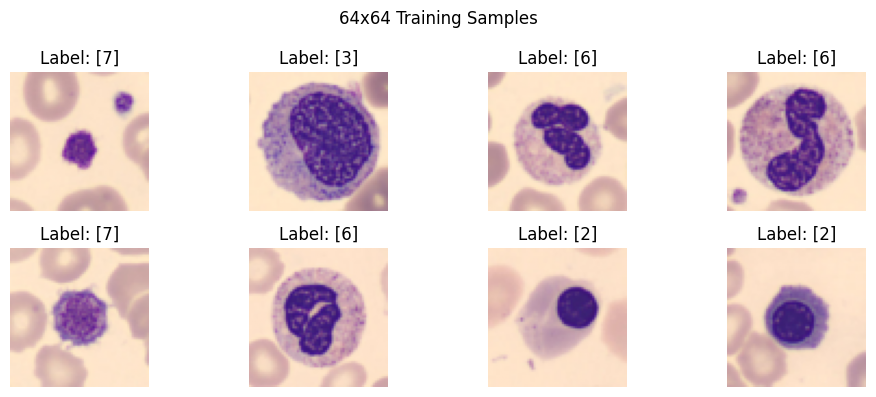

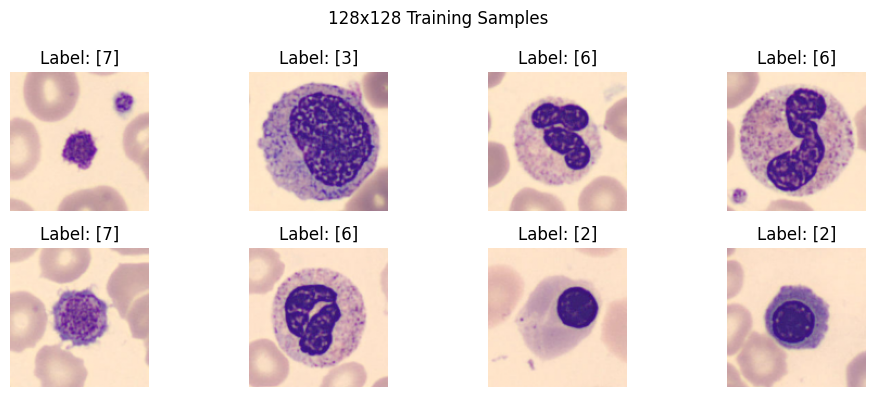

In [ ]:
# STEP 3: Visualize a few samples from 64x64 and 128x128
import matplotlib.pyplot as plt

def show_samples(X, y, title=""):
    plt.figure(figsize=(10, 4))
    for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.imshow(X[i])
        plt.title(f"Label: {y[i]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_samples(X_train_64, y_train_64, title="64x64 Training Samples")
show_samples(X_train_128, y_train_128, title="128x128 Training Samples")


# STEP 2: Build, Train & Evaluate Baseline CNN (64x64)

🧠 Baseline CNN Architecture
We’ll use a simple and effective architecture:

3 Conv2D blocks (Conv + BatchNorm + ReLU + MaxPool + Dropout)

Flatten → Dense → Output layer with 8 softmax units


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# STEP 2.1: Define the CNN model
def create_baseline_cnn(input_shape=(64, 64, 3), num_classes=8):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# STEP 2.2: Compile the model
model = create_baseline_cnn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 685,128 (2.61 MB)

 Trainable params: 684,680 (2.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# STEP 2.3: Train the model
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    X_train_64, y_train_64,
    validation_data=(X_val_64, y_val_64),
    epochs=30,
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 139s 715ms/step - accuracy: 0.5816 - loss: 1.3738 - val_accuracy: 0.2074 - val_loss: 20.7366
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 135s 678ms/step - accuracy: 0.8249 - loss: 0.4840 - val_accuracy: 0.2424 - val_loss: 20.9253
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 125s 670ms/step - accuracy: 0.8735 - loss: 0.3739 - val_accuracy: 0.4871 - val_loss: 4.2798
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 151s 721ms/step - accuracy: 0.9043 - loss: 0.2776 - val_accuracy: 0.6752 - val_loss: 1.4590
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 136s 687ms/step - accuracy: 0.9101 - loss: 0.2560 - val_accuracy: 0.6262 - val_loss: 1.6837
Epoch 6/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 128s 686ms/step - accuracy: 0.9194 - loss: 0.2404 - val_accuracy: 0.7518 - val_loss: 0.9662
Epoch 7/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 126s 672ms/step - accuracy: 0.9206 - loss: 0.2143 - val_accuracy: 0.8324 - val_loss: 0.6043
Epoch 8/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 145s 691ms/step - accuracy: 0.9369

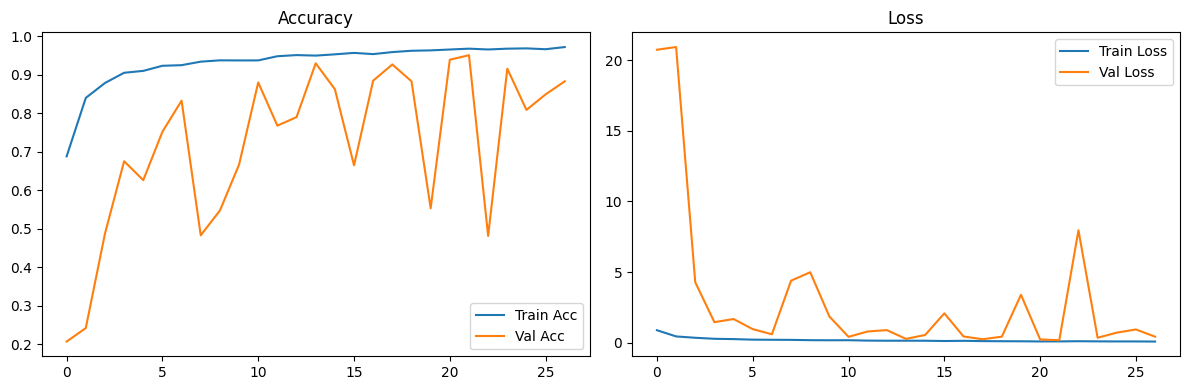

In [ ]:
# STEP 2.4: Plot training curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()


107/107 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.9240 - loss: 0.2917
Test Accuracy: 0.9316
107/107 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       244
           1       1.00      0.92      0.96       624
           2       0.96      0.96      0.96       311
           3       0.85      0.88      0.87       579
           4       0.98      0.98      0.98       243
           5       0.86      0.95      0.90       284
           6       0.94      0.89      0.92       666
           7       1.00      0.99      0.99       470

    accuracy                           0.93      3421
   macro avg       0.93      0.94      0.93      3421
weighted avg       0.93      0.93      0.93      3421



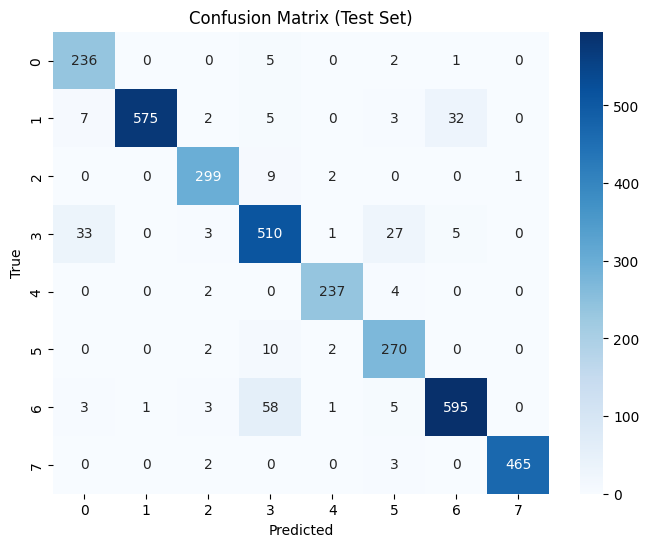

In [ ]:
# STEP 2.5: Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_64, y_test_64)
print(f"Test Accuracy: {test_acc:.4f}")

# Confusion matrix and classification report
y_pred = model.predict(X_test_64).argmax(axis=1)
print(classification_report(y_test_64, y_pred))

conf_matrix = confusion_matrix(y_test_64, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
